In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [78]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
14,2250,3,101.0
8,1310,3,50.0
3,1521,3,75.0
13,1100,2,40.0
11,2785,4,140.0


In [79]:
from sklearn.preprocessing import StandardScaler
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop("price", axis = "columns"))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [80]:
df.price

0      39.07
1     120.00
2      62.00
3      75.00
4      51.00
5      38.00
6     135.00
7     155.00
8      50.00
9     167.00
10     82.00
11    140.00
12     38.00
13     40.00
14    101.00
15     42.00
16     48.00
17     60.00
18    102.00
19     32.00
Name: price, dtype: float64

In [103]:
scaled_y = sy.fit_transform(df["price"].values.reshape(-1,1)).ravel()
scaled_y

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [122]:
def batch_gradient_descent(X, y_truth, learnig_rate, epochs):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    total_samples = X.shape[0]
    bias = 0
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predict = np.dot(w,X.T)+bias
        w_bgd = -(2/total_samples)*(X.T.dot(y_truth - y_predict))
        bias_bdg = -(2/total_samples)*np.sum(y_truth - y_predict)

        w = w - learnig_rate*w_bgd
        bias = bias - learnig_rate*bias_bdg

        cost = np.mean(np.square(y_truth - y_predict))
        if i%10 == 0:
            # print(f'W:{w}, bias:{bias}, cost:{cost}')
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, bias, cost, cost_list, epoch_list

In [121]:
w, bias, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(y_scaled.shape[0],),0.01,500)
w, bias, cost,

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

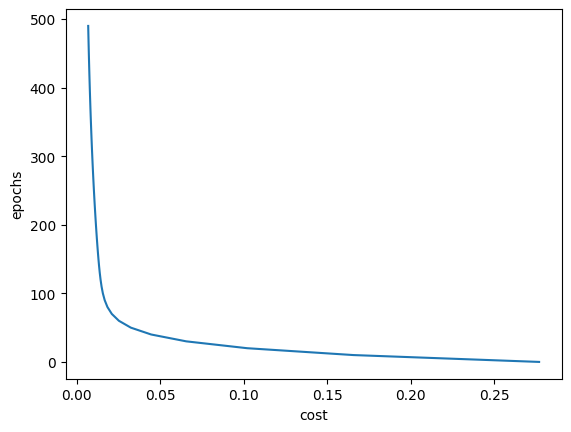

In [124]:
w, bias, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y,0.01,500)
plt.xlabel("cost")
plt.ylabel("epochs")
plt.plot(cost_list,epoch_list)

In [136]:
def predict(area, bedroom, w, bias):
    X_scaled = sx.transform([[area,bedroom]])
    # scaled_price = w[0]*X_scaled[0]+w[1]*X_scaled[1]+bias
    scaled_price =np.dot(w,X_scaled[0])+bias
    return sy.inverse_transform([[scaled_price]])[0][0]

In [137]:
predict(2600,4,w,bias)

C:\Users\niraj.meshram\AppData\Local\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)